In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table("fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
# 학습시킬 feature
x = fruits[['mass','width','height', 'color_score']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [11]:
# K-NN 학습 
# k를 1부터 30까지 순환하여 확인

from sklearn.neighbors import KNeighborsClassifier


# bestK 는 가장 높은 score를 가진 K 저장
scores = []
bestK=0
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    if bestK < knn.score(x_test,y_test):
        bestK = k
    scores.append(knn.score(x_test,y_test))
    

In [16]:
bestK

1

<IPython.core.display.Javascript object>


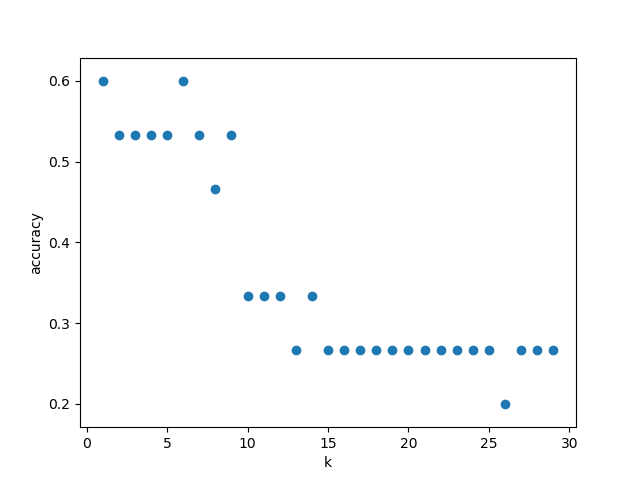

In [13]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(range(1,30),scores)

In [17]:
# 가장 효과 좋은 K일때 결과 예측
# bestK = 1 or 6
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
knn = KNeighborsClassifier(n_neighbors = bestK)

knn.fit(x_train,y_train)

# 2. [무게가 120, 너비가 6, 높이가 8, color_score가 0.7]일때 과일 예측
fruit_prediction = knn.predict([[120,6,8,0.7]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'